In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/Machine Learning Course CS 7/ML project/in-vehicle-coupon-recommendation.csv"
#PATH = "./in-vehicle-coupon-recommendation.csv"

In [ ]:
df = pd.read_csv(PATH)
df = shuffle(df)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5886,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,31,Married partner,...,never,4~8,gt8,4~8,1,0,0,1,0,1
11534,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Male,below21,Single,...,gt8,gt8,gt8,less1,1,0,0,0,1,1
3070,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
5412,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Unmarried partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
1642,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,...,4~8,1~3,4~8,less1,1,1,0,0,1,0


In [ ]:
#no: rows and columns
df.shape

(12684, 26)

In [ ]:
#data type of each column
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [ ]:
#technical summary
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
"""
function for exploring missing values
"""
def exploreMissingValues(data):
  missingFeature = data.isnull().sum()
  missingFeatureNumpy = missingFeature.to_numpy()
  return missingFeature.iloc[missingFeatureNumpy.nonzero()]  

In [ ]:
#explore missing values
exploreMissingValues(df)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file="InCouponRecommendation.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Handle Duplicates

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

Handle Missing Values

In [ ]:
#99% of the data is missing in this column, so drop it
df.drop("car", axis=1, inplace=True)

In [ ]:
missingFeature = exploreMissingValues(df)
for column in missingFeature.index:
  feature_mode = df[column].mode()
  df[column].fillna(feature_mode[0], inplace=True)

In [ ]:
exploreMissingValues(df)

Series([], dtype: int64)

correlation of features

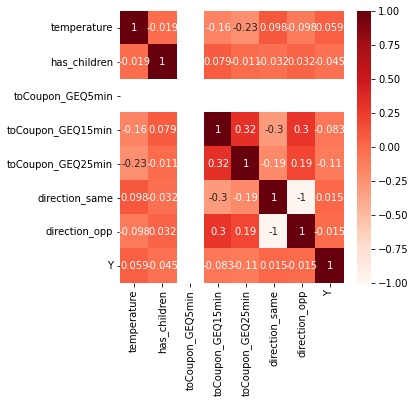

In [ ]:
plt.figure(figsize=(5, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Remove Highly Correlated Features

In [ ]:
threshold = 0.8
cor_mat = df.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)
df = df.drop(to_drop, axis=1)

['direction_opp']


<ipython-input-147-6d6f1fd99b16>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))


Explore Values of feaures

In [ ]:
for column in df.columns:
  print(column," : ", df[column].unique())

destination  :  ['Home' 'No Urgent Place' 'Work']
passanger  :  ['Alone' 'Kid(s)' 'Friend(s)' 'Partner']
weather  :  ['Sunny' 'Rainy' 'Snowy']
temperature  :  [80 55 30]
time  :  ['6PM' '10PM' '2PM' '7AM' '10AM']
coupon  :  ['Restaurant(<20)' 'Restaurant(20-50)' 'Coffee House' 'Bar'
 'Carry out & Take away']
expiration  :  ['2h' '1d']
gender  :  ['Male' 'Female']
age  :  ['31' 'below21' '26' '21' '50plus' '46' '41' '36']
maritalStatus  :  ['Married partner' 'Single' 'Unmarried partner' 'Divorced' 'Widowed']
has_children  :  [1 0]
education  :  ['Graduate degree (Masters or Doctorate)' 'Some college - no degree'
 'High School Graduate' 'Bachelors degree' 'Associates degree'
 'Some High School']
occupation  :  ['Management' 'Student' 'Unemployed' 'Education&Training&Library'
 'Office & Administrative Support' 'Business & Financial'
 'Sales & Related' 'Life Physical Social Science'
 'Healthcare Practitioners & Technical' 'Architecture & Engineering'
 'Computer & Mathematical' 'Transportat

In [ ]:
#drop constant column
df.drop("toCoupon_GEQ5min", axis=1, inplace=True)

Feature Extraction

In [ ]:
#extract new feature named coupon_freq from Bar,	CoffeeHouse,	CarryAway,	RestaurantLessThan20, and	Restaurant20To50
#create dicrionary
couponDictionary = {
    "Coffee House":"CoffeeHouse",
    "Restaurant(<20)":"RestaurantLessThan20",
    "Carry out & Take away":"CarryAway",
    "Bar":"Bar",
    "Restaurant(20-50)":"Restaurant20To50"
}
freqList = list()
couponFreqIndex = list(df.columns).index("coupon")
for i in range(df.shape[0]):
  fte = couponDictionary[df.iloc[i, couponFreqIndex]]
  freq = df[fte].iloc[i]
  freqList.append(freq)
df["coupoun_freq"] = freqList

In [ ]:
#drop Bar,	CoffeeHouse,	CarryAway,	RestaurantLessThan20, and	Restaurant20To50
df.drop(["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"], axis=1, inplace=True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,coupoun_freq
5886,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,31,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,0,0,1,1,gt8
11534,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Male,below21,Single,0,Some college - no degree,Student,Less than $12500,0,0,0,1,less1
3070,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,0,High School Graduate,Unemployed,$37500 - $49999,0,0,0,1,gt8
5412,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Unmarried partner,0,Bachelors degree,Education&Training&Library,$50000 - $62499,1,0,0,1,1~3
1642,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,0,0,0,1~3


In [ ]:
#extract new feature named to_coupon_time from toCoupon_GEQ15min and toCoupon_GEQ25min
df["to_coupon_time"] = df["toCoupon_GEQ15min"] + df["toCoupon_GEQ25min"]
df.drop(["toCoupon_GEQ15min", "toCoupon_GEQ25min"], axis=1, inplace=True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,direction_same,Y,coupoun_freq,to_coupon_time
5886,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,31,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,1,1,gt8,0
11534,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Male,below21,Single,0,Some college - no degree,Student,Less than $12500,0,1,less1,0
3070,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,0,High School Graduate,Unemployed,$37500 - $49999,0,1,gt8,0
5412,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Unmarried partner,0,Bachelors degree,Education&Training&Library,$50000 - $62499,0,1,1~3,1
1642,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,1~3,1


Select Only Important features

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x_enc = oe.fit_transform(df.drop("Y", axis=1))
mi_score = MIC(x_enc,df.Y)

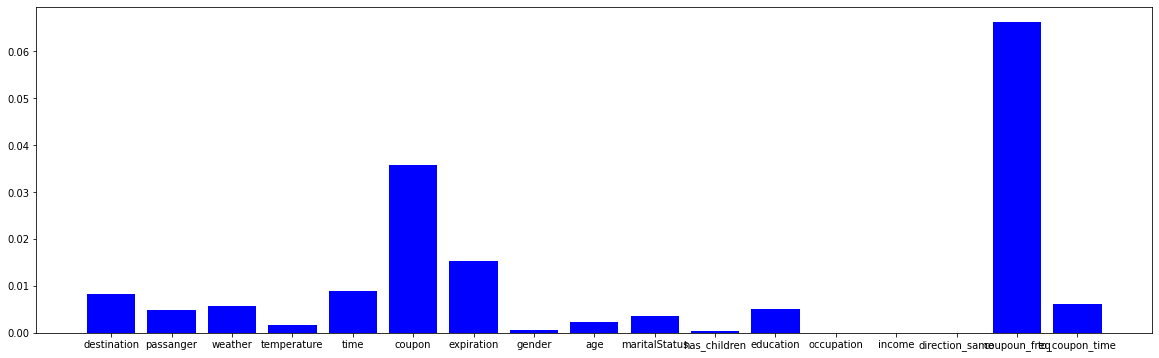

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(df.drop("Y", axis=1).columns, mi_score, color ='blue',
        width = 0.8)
plt.show()

In [ ]:
threshold = 0.005
selected_features = ["Y"]
columns = df.drop("Y", axis=1).columns
for i in range(len(mi_score)):
  s = mi_score[i]
  f = columns[i]
  if s>threshold:
    selected_features.append(f)
print(selected_features)

['Y', 'destination', 'weather', 'time', 'coupon', 'expiration', 'education', 'coupoun_freq', 'to_coupon_time']


In [ ]:
df = df[selected_features]
df.head()

,Y,destination,weather,time,coupon,expiration,education,coupoun_freq,to_coupon_time
5886,1,Home,Sunny,6PM,Restaurant(<20),2h,Graduate degree (Masters or Doctorate),gt8,0
11534,1,Home,Sunny,10PM,Restaurant(20-50),1d,Some college - no degree,less1,0
3070,1,No Urgent Place,Sunny,2PM,Restaurant(<20),1d,High School Graduate,gt8,0
5412,1,Work,Sunny,7AM,Coffee House,1d,Bachelors degree,1~3,1
1642,0,No Urgent Place,Sunny,10AM,Bar,1d,Some college - no degree,1~3,1


Encode features

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Y,to_coupon_time,destination_No Urgent Place,destination_Work,weather_Snowy,weather_Sunny,time_10PM,time_2PM,time_6PM,time_7AM,...,expiration_2h,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,coupoun_freq_4~8,coupoun_freq_gt8,coupoun_freq_less1,coupoun_freq_never
5886,1,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
11534,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3070,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5412,1,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1642,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = df["Y"]
X = df.drop("Y", axis=1)

Spilt dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3, random_state=42)

Solve Class Imbalance problem

In [ ]:
oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [ ]:
def evaluteModel(model, X_train, y_train, X_test, y_test, X_val, y_val):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores = cross_val_score(model, X_val, y_val, cv = 10, scoring='accuracy')
  print(classification_report(y_test, y_pred))
  print("Cross Validation accuracy ", scores.mean())
  print("RocAuc Score : ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Apply KNN

In [ ]:
evaluteModel(KNeighborsClassifier(n_neighbors=9), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.64      0.69      0.66      1091
           1       0.75      0.71      0.73      1431

    accuracy                           0.70      2522
   macro avg       0.70      0.70      0.70      2522
weighted avg       0.70      0.70      0.70      2522

Cross Validation accuracy  0.6871647760802571
RocAuc Score :  0.7563118866579427


Naive Bayes

In [ ]:
evaluteModel(GaussianNB(), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1091
           1       0.74      0.66      0.70      1431

    accuracy                           0.67      2522
   macro avg       0.67      0.68      0.67      2522
weighted avg       0.68      0.67      0.68      2522

Cross Validation accuracy  0.6660055078355518
RocAuc Score :  0.7432865046012064


Logistic Regression

In [ ]:
evaluteModel(LogisticRegression(solver="liblinear", random_state=42), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1091
           1       0.74      0.74      0.74      1431

    accuracy                           0.71      2522
   macro avg       0.70      0.70      0.70      2522
weighted avg       0.71      0.71      0.71      2522

Cross Validation accuracy  0.7016840425764431
RocAuc Score :  0.7717180975659436


SVM

In [ ]:
evaluteModel(SVC(random_state=42, probability=True), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1091
           1       0.76      0.77      0.77      1431

    accuracy                           0.73      2522
   macro avg       0.73      0.72      0.72      2522
weighted avg       0.73      0.73      0.73      2522

Cross Validation accuracy  0.7029943391690163
RocAuc Score :  0.7814332500011208


Random Forest

In [ ]:
evaluteModel(RandomForestClassifier(max_depth=24 , random_state=42), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1091
           1       0.73      0.73      0.73      1431

    accuracy                           0.69      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.69      0.69      0.69      2522

Cross Validation accuracy  0.6693266015343255
RocAuc Score :  0.7419196257288366


CatBoost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
evaluteModel(CatBoostClassifier(verbose=False), X_train, y_train, X_test, y_test, X_val, y_val)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1091
           1       0.75      0.77      0.76      1431

    accuracy                           0.72      2522
   macro avg       0.72      0.71      0.72      2522
weighted avg       0.72      0.72      0.72      2522

Cross Validation accuracy  0.6888171267457872
RocAuc Score :  0.7761838330383719


Artificial Neural Network

In [ ]:
def getANNModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [ ]:
no_neuron = [X_train.shape[1], 2*X_train.shape[1], 2*X_train.shape[1], 1]
model = getANNModel(no_neuron)
model.fit(np.array(X_train), np.array(y_train), epochs=50)

Epoch 1/50
251/251 [==============================] - 2s 2ms/step - loss: 0.6215 - accuracy: 0.6764
Epoch 2/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.6945
Epoch 3/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5808 - accuracy: 0.6982
Epoch 4/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.6989
Epoch 5/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5719 - accuracy: 0.7066
Epoch 6/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.7061
Epoch 7/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5656 - accuracy: 0.7137
Epoch 8/50
251/251 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7177
Epoch 9/50
251/251 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7117
Epoch 10/50
251/251 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.7202

In [ ]:
pred = model.predict(np.array(X_test))
y_pred= np.round(pred, 0)
print(classification_report(y_test, y_pred))
scores = model.evaluate(X_val, y_val)
print("cross validation accuracy : ", scores[1])
print("AucRoc Score : ", roc_auc_score(y_test, pred))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1091
           1       0.75      0.78      0.76      1431

    accuracy                           0.72      2522
   macro avg       0.72      0.72      0.72      2522
weighted avg       0.72      0.72      0.72      2522

95/95 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6931
cross validation accuracy :  0.6930954456329346
AucRoc Score :  0.7750398566250389


Hyper parameter tuning

In [ ]:
param_dictionary = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              } 
bestParam = RandomizedSearchCV(SVC(random_state=42, probability=True), param_dictionary, refit = True, n_iter=5)
bestParam.fit(X_train, y_train)
print(bestParam.best_estimator_)
y_pred = bestParam.predict(X_test)
scores = cross_val_score(bestParam, X_val, y_val, cv = 10, scoring='accuracy')
print(classification_report(y_test, y_pred))
print("Cross Validation accuracy ", scores.mean())
print("RocAuc Score : ", roc_auc_score(y_test, bestParam.predict_proba(X_test)[:, 1]))

SVC(C=1, gamma=0.1, probability=True, random_state=42)
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1091
           1       0.76      0.77      0.77      1431

    accuracy                           0.73      2522
   macro avg       0.73      0.73      0.73      2522
weighted avg       0.73      0.73      0.73      2522

Cross Validation accuracy  0.6917743098813193
RocAuc Score :  0.7807052941255593


Save Model

In [ ]:
import joblib
joblib.dump(bestParam.best_estimator_,  
            'InVehicleCouponRecommendationPredictor.pkl')

['InVehicleCouponRecommendationPredictor.pkl']